# Overview

This week's curriculum is a little bit of a mixed bag. We'll cover 3 topics that are not super-related, but all are _very useful_ (and there is some connection between them). The overview is

* Tricks for raw text (chapter 3)
* Finding the important words in a document (TF-IDF)
* Community Detection

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, but an amazing ressource that you'll keep returning to. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. Finally, we'll jump to _sentiment analysis_. A topic which is pretty useless when it comes to wikipedia (because all wikipedia text is designed to be neutral), but which is highly useful elsewhere as we shall see (and since the course is all about teaching you stuff that's useful for the project and the rest of your lives, I'll get into it here. 

# Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP1e is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

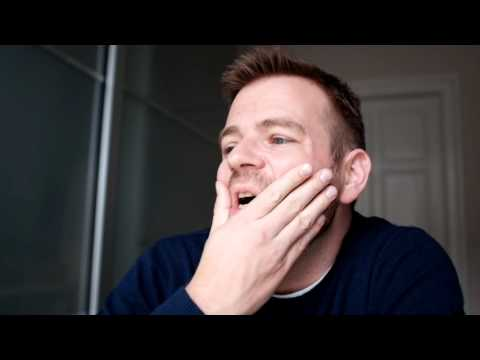

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> _Reading_: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you _know that Chapter 3 of this book exists_, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

> _Exercise_ 1: Just a couple of examples from the book: Work through the exercises NLPP1e 3.12: 6, 30\.
> 

# Words that characterize the parties

In this section, we'll begin to play around with how far we can get with simple strategies for looking at text. The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something very interesting about humans that produce text. Then, in the exercise (which is the main work you'll do today), we'll use a very simple weighting scheme called TF-IDF to find the important words for each party (according to wikipedia). In cleaning the wiki pages, we'll use some of the stuff you've just read about above. Finally, we'll even visualize them in a fun little word cloud (below is what I found for Republicans and Democrats). Wordclouds may not be immediately understandable, but if you do some research, you should find they are meaningful.

<img src="https://github.com/suneman/socialgraphs2018/blob/master/files/wordclouds.png?raw=true" alt="Drawing" style="width: 800px;"/>


> **Video lecture**: Simple methods reveal a lot. I talk a little bit about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

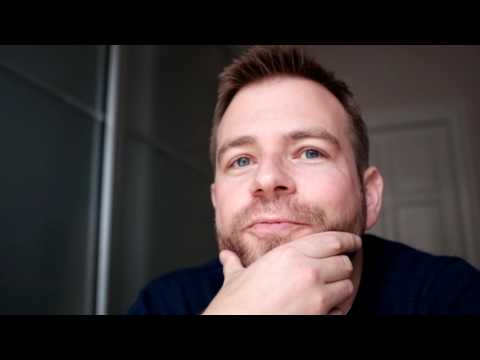

In [3]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

 _Exercise_ 2: TF-IDF and the Republican and Democratic parties.
> 
> Setup. We want to start from a clean version of the congress representatives pages with as little wiki-markup as possible. 
> We needed it earlier to get the links, etc, but now we want a readable version. We can get a fairly nice version directly
> from the wikipedia API, simply call `prop=extracts&exlimit=max&explaintext` instead of `prop=revisions` as we did earlier.
> This will make the API return the text without links and other markup. 
> 
> * Use this method to retrive a nice copy of all the representatives in the 115th congress (the current one). You can, of course, also clean the existing pages using
> regular expressions, if you like (but that's probably more work).
> 
> The exercise.
> 
> * First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?
> * Since we want to find out which words are important for each _party_, so we're going to create two large documents, one for the Democratic and one for the Republican party. Tokenize the pages, and combine the tokens into one long list including all the pages of the members of the same party. Remember the bullets below for success.
>   * If you dont' know what _tokenization_ means, go back and read Chapter 3 again. This advice is valid for every cleaning step below.
>   * Exclude the congress members names (since we're interested in the words, not the names).
>   * Exclude punctuation.
>   * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
>   * Exclude numbers (since they're difficult to interpret in the word cloud).
>   * Set everything to lower case.
>   * Note that none of the above has to be perfect. It might not be easy to remove _all_ representatives names. And there's some room for improvisation. You can try using stemming. In my own first run the results didn't look so nice, because some pages are very detailed and repeat certain words again and again and again, whereas other pages are very short. For that reason, I decided to use the unique set of words from each page rather than each word in proportion to how it's actually used on that page. Choices like that are up to you.
> * Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within each party. 
>   * Describe similarities and differences between the parties.
>   * Why aren't the TFs not necessarily a good description of the parties?
> * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?
> * We're ready to calculate TF-IDF. Do that for each party. 
>   * List the 10 top words for each party.
>   * Are these 10 words more descriptive of the party? If yes, what is it about IDF that makes the words more informative?
> * Normally, TF-IDF is used for single documents. What does TF-IDF tell us about the content of a single document in a collection.
> 

### The word cloud. 

The most difficult thing about the word cloud exercise is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c https://conda.anaconda.org/amueller wordcloud
 
If you can't get that to work, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. Use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

_Exercise 3 (word-cloud edition)_
 
> * The package needs a string to work on. The way that I converted my TF-IDF results to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its TF-IDF score (rounded up to the nearest integer value). 
> * Now, create word-cloud for each party. Feel free to make it as fancy or non-fancy as you like. Comment on the results.
> 

# Community detection


Now that we have learnt about text analysis, it is time to go back to our network! Before we begin, let's learn about communities. If you want to learn more details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the lecture should be enough to get you started. For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 

You can watch the 2015 video [here](https://youtu.be/06GL_KGHdbE/).

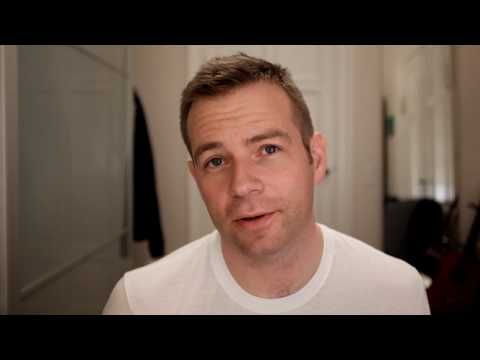

In [6]:
YouTubeVideo("FSRoqXw28RI",width=800, height=450)

> _Exercise 8_: Use the concept of modularity to explore how _community-like_ the parties and states are.
> 
> * Explain the concept of modularity in your own words.
> * Consider the undirected version of the graph for the 115th house of representatives.
> * Compute the modularity when you partition nodes based on their party. Modularity is described in the _Network Science_ book, section 9.4). Use **equation 9.12** in the book to calculate the modularity _M_ of the parties-partitioning. Are the parties good community?
> * Repeat the exercise above by considering states instead of parties. Are the states good communities?
> * Would you expect these results in light of what we have found in the previous exercises?

> _Exercise 9_: Community detection on the house of representatives network. 
> 
> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities in the full house of representatives network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the parties/states as communities? What does this comparison reveal about the parties/states?
    >   * \[**Note**: This implementation is now available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain)\]. 
    >   * You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
> * Optional: Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 2). This time assign each node a different color based on their _community_. Describe the structure you observe.
> * Optional: Compare the communities found by your algorithm with the parties by creating a matrix **_D_** with dimension (_B_ times _C_), where _B_ is the number of parties and _C_ is the number of communities. We set entry _D_(_i_,_j_) to be the number of nodes that party _i_ has in common with community _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the parties.
> * Optional: Repeat the point above, considering states instead of parties.

> _Exercise 10_ (Optional): Understanding communities using text analysis. 
> 
> * We want to find out which words are important for each community, so we're going to create N large documents, where N is the number of communities you have found in exercise 9. Tokenize the pages, and combine the tokens into one long list including all the pages of the members of the same community. Repeat the process in exercise 2 for success.
> * Compute the TF-IDF for each community. 
> * Create a word-cloud for each community. Do they help interpreting the communities you have found?